<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/unpack_HIC_pickles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
from statistics import mean
import os
import gc
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression


!pip install diptest
import diptest

In [33]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
set_lists =[np.array([73,  1, 60, 18, 58]),
            np.array([23, 76, 51, 63, 66]),
            np.array([31, 47, 30, 20,  5]),
            np.array([15, 77, 43, 53, 12]),
            np.array([ 3, 56, 29, 75, 13]),
            np.array([70, 42, 65, 52, 54]),
            np.array([46, 41, 50, 40, 82]),
            np.array([67, 24, 84, 61,  6]),
            np.array([26, 74, 17,  2, 44]),
            np.array([81, 71, 49, 45, 88]),
            np.array([22, 11, 86, 83, 14]),
            np.array([33, 27, 25, 59, 38]),
            np.array([68, 39, 78, 69, 87]),
            np.array([16, 19, 48, 21, 79]),
            np.array([57, 72, 80, 64, 28]),
            np.array([62, 85])]

In [35]:
result_list = [pickle.load(open(f'/content/drive/MyDrive/hawaii_soils/result_list_{set_list_id}.pkl', 'rb')) for set_list_id in range(len(set_lists))]

In [36]:
# result_list

In [37]:
flattened_result_list = [item for sublist in result_list for item in sublist]

In [7]:
# [flattened_result_list[i]['xval_id'] for i in range(len(flattened_result_list))]

In [40]:
diptest.dipstat([1,2,3,45,6])

0.1

In [54]:
diptest_result_list = [ np.mean([(diptest.dipstat(dict_thing['imp_c_quantiles'])>.05) == (diptest.dipstat(thing)>.05) for thing in dict_thing['prediction_quantiles']]) for dict_thing in flattened_result_list]

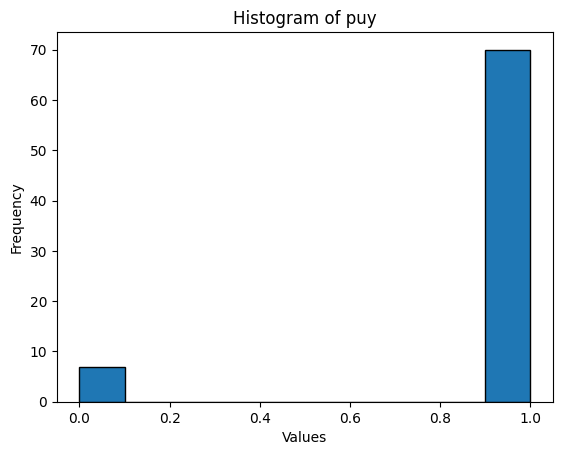

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'puy' is a list of values
puy = diptest_result_list

# Create a histogram
plt.hist(puy, bins=10, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of puy')
plt.show()

In [38]:
[i for i in flattened_result_list[9]]

['xval_id',
 'lat_lon',
 'xy_sample',
 'xy_driver',
 'imp_c_scaled',
 'imp_c_quantiles',
 'real_predicted_labels',
 'scaled_predictions',
 'prediction_quantiles',
 'predicted_predicted_labels']

In [9]:
imput_results = [(item[5] , result['imp_c_quantiles'][5]) for result in flattened_result_list for item in result['prediction_quantiles']]

In [10]:
len(flattened_result_list[0]['xy_driver'])

137

In [11]:
unique_arrays = [list(x) for x in set(tuple(arr) for arr in flattened_result_list[0]['prediction_quantiles'])]

In [12]:
len(unique_arrays)

83

In [13]:
len(flattened_result_list[0]['prediction_quantiles'])

137

In [96]:
y_res_list = []
x_res_list = []
for quantile_n in range(10):
  # Calculate the mean of item[x] values directly for each result in flattened_result_list
  imput_results = [(mean(item[quantile_n] for item in result['prediction_quantiles']), result['imp_c_quantiles'][quantile_n]) for result in flattened_result_list]
  x_res = [i[0] for i in imput_results]
  y_res = [i[1] for i in imput_results]
  x_res_list.append(x_res)
  y_res_list.append(y_res)

y_res = [item for sublist in y_res_list for item in sublist]
x_res = [item for sublist in x_res_list for item in sublist]


In [97]:
# [result['imp_c_quantiles'][quantile_n] for result in flattened_result_list]

AttributeError: 'list' object has no attribute 'flatten'

In [84]:
max(x_res)[0]

38.38778305053711

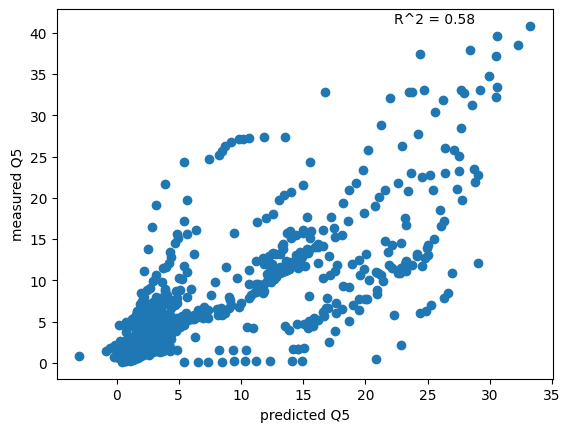

In [98]:
x_res = np.array(x_res).reshape(-1, 1)  # Reshape if data is a 1D array
y_res = np.array(y_res)

# Perform linear regression
model = LinearRegression().fit(x_res, y_res)
r_squared = model.score(x_res, y_res)  # R-squared

# Create scatter plot
plt.scatter(x_res, y_res)
plt.xlabel('predicted Q5')
plt.ylabel('measured Q5')
plt.title('')

# Add a 1:1 line
max_val = max(max(x_res), max(y_res))
min_val = min(min(x_res), min(y_res))
# plt.plot([min_val, max_val], [min_val, max_val], 'r--')

# Annotate the plot with the R-squared value
x_annotate = max(x_res)
y_annotate = max(y_res)
plt.annotate(f'R^2 = {r_squared:.2f}', xy=(x_annotate, y_annotate), xycoords='data',
             xytext=(-40, 10), textcoords='offset points',
             ha='right', va='top')

plt.show()


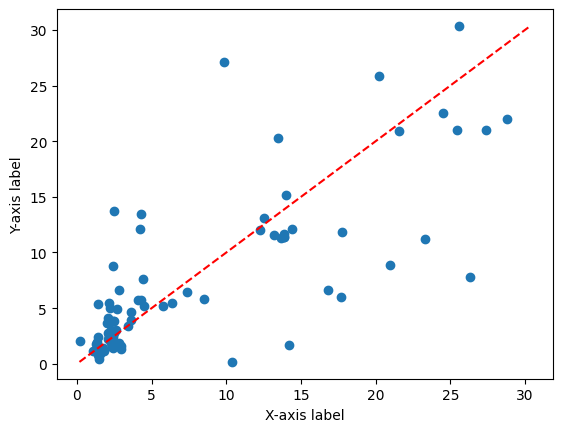

In [18]:
plt.scatter(x_res, y_res)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('')

max_val = max(max(x_res), max(y_res))
min_val = min(min(x_res), min(y_res))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.show()
